# Crash Analysis System (CAS) data exploration

## Data inspection

In [1]:
import pandas as pd

In [2]:
# Load table from csv file as a dataframe
cas_df = pd.read_csv('Crash_Analysis_System_(CAS)_data.csv')

# Add extra column with 1s to help with pivoting later
cas_df['crashCount'] = pd.Series([1 for x in range(len(cas_df.index))])
cas_df

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB,crashCount
0,2.037858e+06,5.707835e+06,1,NaN,544801.0,0.0,NaN,0.0,2.0,NaN,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,1
1,1.799424e+06,5.815528e+06,2,NaN,528900.0,0.0,NaN,0.0,2.0,NaN,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,1
2,1.756461e+06,5.936053e+06,3,NaN,507000.0,0.0,NaN,0.0,0.0,NaN,...,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null,1
3,1.551129e+06,5.171320e+06,4,NaN,597513.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null,1
4,1.245391e+06,4.849172e+06,5,NaN,611500.0,0.0,NaN,0.0,1.0,NaN,...,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821739,1.757918e+06,5.914599e+06,1318959,NaN,518600.0,0.0,NaN,0.0,2.0,NaN,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,1
821740,1.833766e+06,5.638669e+06,1318960,NaN,554900.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null,1
821741,1.758255e+06,5.918060e+06,1318961,NaN,517400.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null,1
821742,1.773738e+06,5.888266e+06,1318962,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Open,1.0,0.0,0.0,Light rain,Null,1


In [3]:
cas_df.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSi

Some columns are hard to interpret. For instance, `strayAnimal` could refer to stray animals that were actively involved in the crash and contributed to the cause, e.g. chicken crossing the road; or these animals became stray as a result of the crash, e.g. traumatized pets. In other words, was the animal counted as a contributing factor or just a circumstancial feature? I suppose the interpretation might depend on how and why these particular features were recorded,e.g. to indicate the damage, to help attributing the cause, etc.

Focus on three sets of column labels, which we will call `agent_types`, `feature_types`, and `harm_types`. Labels in these three sets will correspond to columns with **counts** of different moving agent/vehicle types, different feature/object/factor types, and different types of harm for each crash.

### Vehicle types

In [4]:
# List of column labels referring to a type of counted moving agents  
agent_types = ['pedestrian','bicycle','moped','motorcycle','bus','schoolBus',
               'suv','truck','train','taxi','carStationWagon','vanOrUtility', 
               'vehicle','unknownVehicleType'
              ]
cas_df[agent_types].describe().loc[['count','mean','min','max']]

,pedestrian,bicycle,moped,motorcycle,bus,schoolBus,suv,truck,train,taxi,carStationWagon,vanOrUtility,vehicle,unknownVehicleType
count,26605.000000,821739.000000,821739.000000,821739.000000,821739.00000,821739.000000,821739.000000,821739.000000,332913.000000,821739.000000,821739.000000,821739.000000,332913.000000,821739.000000
mean,1.041383,0.028963,0.007098,0.036274,0.01587,0.000753,0.105117,0.080399,0.001511,0.010698,1.311054,0.175788,0.025046,0.003057
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,5.000000,4.000000,8.000000,3.00000,3.000000,6.000000,5.000000,1.000000,5.000000,11.000000,6.000000,4.000000,3.000000


From the number of missing counts in the above summary, it is reasonable to assume that all the missing counts for the pedestrians should be zeros. It is difficult to say why `trains` and `vehicles` have so many missing values (more than half), but for all other vehicle types the number of missing values is very small and thus can be ignored.

### Counted features

In [5]:
# List of column labels referring to a type of counted features/objects/factors
feature_types = ['bridge', 'cliffBank','ditch','fence','guardRail',
                 'houseOrBuilding','kerb','objectThrownOrDropped',
                 'otherObject','parkedVehicle','phoneBoxEtc','postOrPole',
                 'trafficIsland','trafficSign','tree','waterRiver',
                 'strayAnimal','slipOrFlood','roadworks'
                ]
cas_df[feature_types].describe().loc[['count','mean','min','max']]

,bridge,cliffBank,ditch,fence,guardRail,houseOrBuilding,kerb,objectThrownOrDropped,otherObject,parkedVehicle,phoneBoxEtc,postOrPole,trafficIsland,trafficSign,tree,waterRiver,strayAnimal,slipOrFlood,roadworks
count,332913.000000,332913.000000,332913.00000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000,332913.000000
mean,0.013724,0.106319,0.09443,0.210034,0.078095,0.023568,0.035361,0.002217,0.023439,0.259122,0.012427,0.122831,0.028815,0.048709,0.101555,0.009967,0.003454,0.002508,0.002932
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,3.000000,3.00000,3.000000,4.000000,2.000000,3.000000,4.000000,5.000000,8.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000


The following check shows that `NaN` values for column `train` and columns listed in `feature_types` appear in same rows, suggesting that these particular columns came from the same source but different from that of other columns listed in `agent_types`. In other words, the missing values in the CAS dataset may be due to it being merged from multiple sources.

In [6]:
cas_df[(cas_df['train'].isna())][feature_types].isna().all()

bridge                   True
cliffBank                True
ditch                    True
fence                    True
guardRail                True
houseOrBuilding          True
kerb                     True
objectThrownOrDropped    True
otherObject              True
parkedVehicle            True
phoneBoxEtc              True
postOrPole               True
trafficIsland            True
trafficSign              True
tree                     True
waterRiver               True
strayAnimal              True
slipOrFlood              True
roadworks                True
dtype: bool

### Degrees of harm

In [7]:
# List of column labels referring to a type of counted harm, i.e. injuries/fatalities 
harm_types = ['fatalCount','minorInjuryCount','seriousInjuryCount','crashCount']
cas_df[harm_types].describe().loc[['count','mean','std','min','max']]

,fatalCount,minorInjuryCount,seriousInjuryCount,crashCount
count,821743.000000,821743.000000,821743.000000,821744.0
mean,0.010433,0.318563,0.069203,1.0
std,0.116837,0.641788,0.301608,0.0
min,0.000000,0.000000,0.000000,1.0
max,9.000000,34.000000,14.000000,1.0


In [8]:
print('Cumulative crash count:',cas_df['crashCount'].sum())
print('Cumulative count of minor injuries:',cas_df['minorInjuryCount'].sum())
print('Cumulative count of serious injuries:',cas_df['seriousInjuryCount'].sum())
print('Cumulative fatalities count:',cas_df['fatalCount'].sum())

Cumulative crash count: 821744
Cumulative count of minor injuries: 261777.0
Cumulative count of serious injuries: 56867.0
Cumulative fatalities count: 8573.0


### Coordinates, dates, and identifiers
Columns labeled `X` and `Y` clearly provide crash coordinates (in unspecified coordinate system), whereas `OBJECTID`, `areaUnitID`, and `tlaID` seem to be identifiers that might be useful for linking with other (GIS?) datasets.  We will ignore most of these columns, but will rely on `region` for regional breakdown, `urban` for comparing fatality rates on open and urban roads, and `year` for temporal analysis (i.e. looking for trends over time).

## National trends

It is important to get a sense for how things change over time: are they getting better, or are they improving?
It's hard to develop this sense by just staring at the tabulated data, but we can break-down the crash counts by year and look at temporal trends. We can also adjust these trends using population data (from StatsNZ), and compare with other countries on per-capita basis.

In [9]:
import numpy as np

In [10]:
# Aggregate crash, injury, and fatality counts for each year using a pivot operation
annual_counts = pd.pivot_table(cas_df,
                               values=['crashCount','minorInjuryCount','seriousInjuryCount','fatalCount'], 
                               index='crashYear',                     
                               aggfunc=np.sum)

# Create a commensurate dataframe for annual estimates of resident population
nzpop_df = pd.read_csv('estimated-resident-population-of-new-zealand-at-30-june-2023.csv',
                       parse_dates=True, index_col=0)
nzpop_df.index = pd.to_datetime(nzpop_df.index, format="%b-%y")
nzpop_df = nzpop_df.resample('Y').mean()
nzpop_df.index = nzpop_df.index.strftime('%Y').astype(int)
nzpop_df.drop([1991,1992,1993,1994,1995,1996,1997,1998,1999], inplace=True)

# Add the population estimates as another column to the annual_counts dataframe 
annual_counts = pd.concat([annual_counts,nzpop_df], axis=1)
annual_counts.rename(columns={"Estimated resident population":"estimatedPopulation"}, inplace=True)

# Calculate crash and fatality counts per capita
annual_counts['crashesPer100k'] = (100000*annual_counts['crashCount'])/annual_counts['estimatedPopulation']
annual_counts['fatalitiesPer100k'] = (100000*annual_counts['fatalCount'])/annual_counts['estimatedPopulation']
annual_counts['injuriesPer100Crashes'] = 100*(annual_counts['minorInjuryCount']+annual_counts['seriousInjuryCount'])/annual_counts['crashCount']
annual_counts['fatalitiesPer100Crashes'] = 100*annual_counts['fatalCount']/annual_counts['crashCount']
annual_counts

,crashCount,fatalCount,minorInjuryCount,seriousInjuryCount,estimatedPopulation,crashesPer100k,fatalitiesPer100k,injuriesPer100Crashes,fatalitiesPer100Crashes
2000,31996,462.0,8776.0,2286.0,3862900.0,828.289627,11.959926,34.573072,1.443930
2001,36125,455.0,10002.0,2473.0,3892075.0,928.168137,11.690422,34.532872,1.259516
2002,38045,405.0,11406.0,2649.0,3960325.0,960.653482,10.226433,36.943094,1.064529
2003,37950,461.0,11907.0,2618.0,4036675.0,940.130181,11.420290,38.274045,1.214756
2004,37051,435.0,11548.0,2552.0,4095275.0,904.725568,10.621997,38.055653,1.174057
2005,38364,405.0,12063.0,2585.0,4141850.0,926.252761,9.778239,38.181629,1.055677
2006,39778,393.0,12695.0,2688.0,4191325.0,949.055490,9.376510,38.672130,0.987983
2007,41661,421.0,13492.0,2712.0,4230800.0,984.707384,9.950837,38.894890,1.010537
2008,39535,366.0,12770.0,2587.0,4266325.0,926.675769,8.578812,38.844062,0.925762
2009,38247,384.0,12234.0,2464.0,4311375.0,887.118379,8.906671,38.429158,1.004000


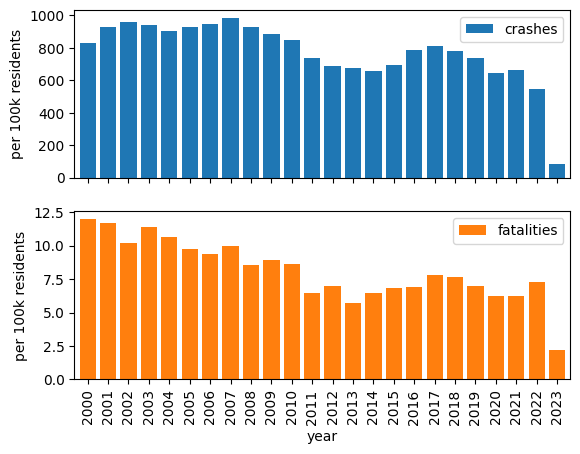

In [11]:
axs = annual_counts[['crashesPer100k','fatalitiesPer100k']].plot.bar(ylabel='per 100k residents',
                                                               xlabel='year',
                                                               subplots=True,
                                                               title=['',''],
                                                               legend=True,
                                                               width=0.8
                                                              )
axs[0].legend(labels=['crashes'])
axs[1].legend(labels=['fatalities'])

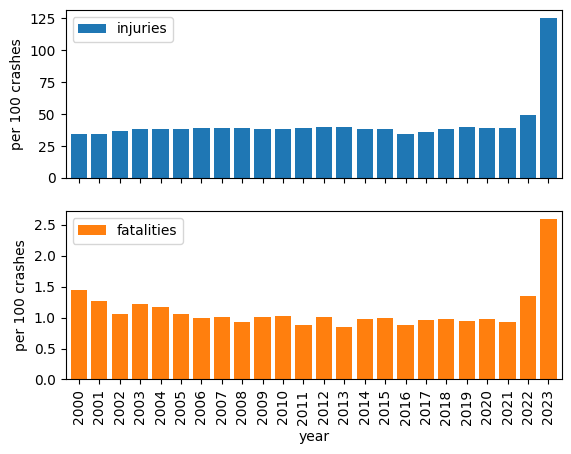

In [12]:
axs = annual_counts[['injuriesPer100Crashes','fatalitiesPer100Crashes']].plot.bar(ylabel='per 100 crashes',
                                                               xlabel='year',
                                                               subplots=True,
                                                               title=['',''],
                                                               legend=True,
                                                               width=0.8
                                                              )
axs[0].legend(labels=['injuries'])
axs[1].legend(labels=['fatalities'])

### Holidays
The dataset declares some crashes one of four holiday annual holiday periods: 'Christmas New Year', 'Easter','Labour Weekend', and 'Queens Birthday'. Although these periods are not defined in the dataset, they can be estimated to be about $10+5+3+3 = 21$ days, or $3$ weeks, which accounts for nearly 6% of a whole year. It might be useful to know how the combined holiday share of annual crashes and fatalities changed over the years.

In [13]:
hol_counts = pd.pivot_table(cas_df,
                            values=['crashCount','fatalCount'],
                            index='crashYear', 
                            columns='holiday', 
                            aggfunc=np.sum)
hol_counts[('crashCount','combined')] = hol_counts[('crashCount')].sum(axis=1)
hol_counts[('fatalCount','combined')] = hol_counts[('fatalCount')].sum(axis=1)
#hol_counts

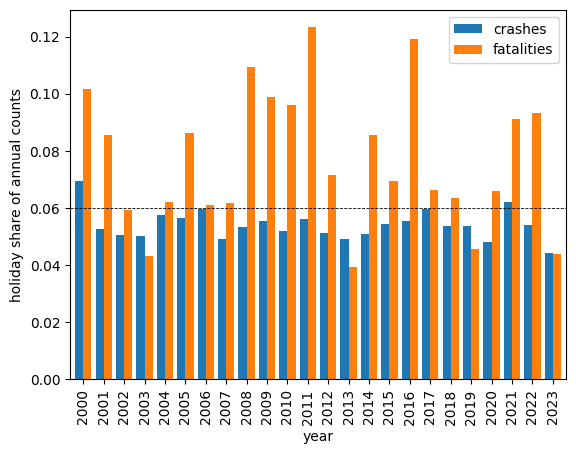

In [14]:
hol_fracs = pd.DataFrame()
hol_fracs.index = hol_counts.index
hol_fracs['crashes'] = hol_counts[('crashCount','combined')]/annual_counts['crashCount']
hol_fracs['fatalities'] = hol_counts[('fatalCount','combined')]/annual_counts['fatalCount']
ax = hol_fracs.plot.bar(width=0.8,ylabel='holiday share of annual counts',xlabel='year')
ax.axhline(y=0.06,color='black',linestyle='--',linewidth=0.6)

### Urban vs open roads
From regional variation one could glean crashes in cities are, on average, less lethal than crashes in the country. This observation is further supported by considering an aggregate split over the binary `urban` attribute, which presumably distinguishes between a) roads in urban areas with lower speed limits and b) roads outside urban areas, i.e. in the countryside, with higher speed limits.    

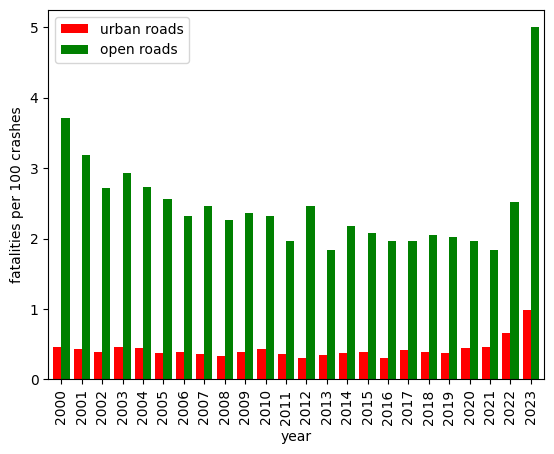

In [15]:
urban_pt = pd.pivot_table(cas_df,
                    values=['crashCount','fatalCount'],
                    index='crashYear', 
                    columns='urban', 
                    aggfunc=np.sum)
urban_pt[('fatalitiesPer100crashes','Urban')] = 100*urban_pt[('fatalCount','Urban')]/urban_pt[('crashCount','Urban')]
urban_pt[('fatalitiesPer100crashes','Open')] = 100*urban_pt[('fatalCount','Open')]/urban_pt[('crashCount','Open')]
ax = urban_pt['fatalitiesPer100crashes'].plot.bar(width=0.8, ylabel='fatalities per 100 crashes', xlabel='year',color=['red','green'])
ax.legend(labels=['urban roads','open roads'])

## Regional variation

Here we split the national aggregate counts by regions as well as years.

Found [this solution from stackoverflow](https://stackoverflow.com/questions/68382133/pandas-stacked-histogram-from-column-of-dataframe-by-values-of-another-column) to plot a histogram stacked by "region", but it caused my Python kernel to crash, presumably due to excessive memory usage when dealing with the entire table. Extracting just the three relevant columns into a separate dataframe and applying the solution to this smaller dataframe resolves the issue. However, I don't really understand the solution on StackOverflow, so I've decided to proceed by aggregating using a pivot operation first and then plotting a stacked bar chart instead of a stacked histogram.

In [16]:
pt = pd.pivot_table(cas_df,
                    values='crashCount',
                    index='crashYear', 
                    columns='region', 
                    aggfunc=np.sum)
for column in pt.columns: 
    pt[column] = pt[column]/annual_counts['crashCount'] 

In [17]:
pt

region,Auckland Region,Bay of Plenty Region,Canterbury Region,Gisborne Region,Hawke's Bay Region,Manawatū-Whanganui Region,Marlborough Region,Nelson Region,Northland Region,Otago Region,Southland Region,Taranaki Region,Tasman Region,Waikato Region,Wellington Region,West Coast Region
crashYear,,,,,,,,,,,,,,,,
2000,0.383954,0.041755,0.111358,0.009970,0.038630,0.062008,0.008501,0.009001,0.031723,0.048537,0.022409,0.023784,0.009251,0.085917,0.099919,0.009189
2001,0.378408,0.048194,0.107516,0.012042,0.036484,0.056415,0.008388,0.009080,0.031003,0.054561,0.025689,0.022256,0.008166,0.100706,0.089273,0.007779
2002,0.389302,0.051281,0.096465,0.011828,0.037718,0.058799,0.010172,0.010277,0.032488,0.059324,0.025470,0.022053,0.008437,0.091076,0.084584,0.007097
2003,0.380632,0.059736,0.093491,0.010962,0.041238,0.054466,0.009091,0.010777,0.040896,0.055389,0.025033,0.020659,0.010145,0.096232,0.080711,0.007194
2004,0.362365,0.057839,0.089660,0.012145,0.044344,0.053899,0.010202,0.011525,0.041564,0.059108,0.023940,0.020377,0.009419,0.099269,0.091064,0.009446
2005,0.354186,0.059457,0.097018,0.012512,0.045094,0.054400,0.010348,0.009175,0.037796,0.055599,0.024893,0.021114,0.007533,0.108696,0.090058,0.008107
2006,0.345995,0.057720,0.105837,0.011212,0.040500,0.051461,0.010357,0.010307,0.038790,0.053924,0.024410,0.021142,0.007793,0.108276,0.101488,0.008070
2007,0.333333,0.055544,0.109023,0.010153,0.044262,0.047334,0.010057,0.009793,0.039125,0.053623,0.023475,0.023883,0.008977,0.102782,0.117160,0.008137
2008,0.342684,0.053016,0.105729,0.012723,0.039307,0.048084,0.009789,0.010548,0.039459,0.055520,0.025800,0.024409,0.008828,0.098874,0.113520,0.008094


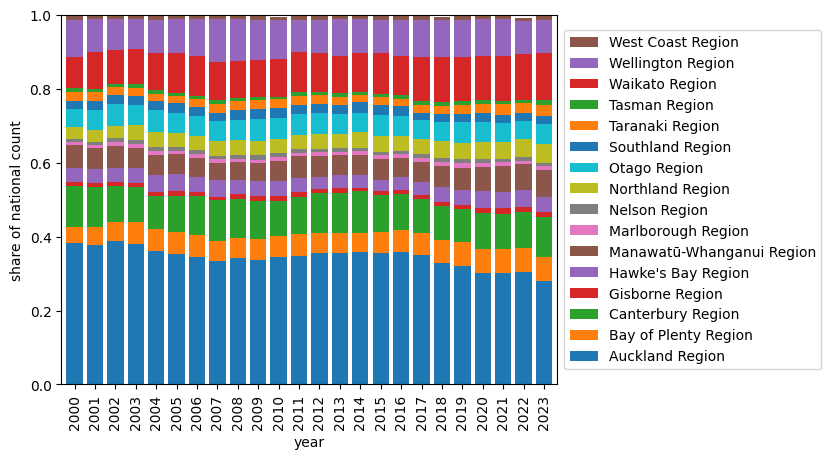

In [18]:
ax = pt.plot.bar(stacked=True, width = 0.8, ylim=(0,1), ylabel='share of national count', xlabel='year')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1.0, 0.5))

Let's look at the correlation matrix between the regional annual tallies, but without reading too much into it, because the interpretation is actually not straightforward, especially when looking at correlation between shares. The main reason for attempting this approach is to see if there is negative correlation, which would (possibly) be indicative of some trade-offs between regions. 

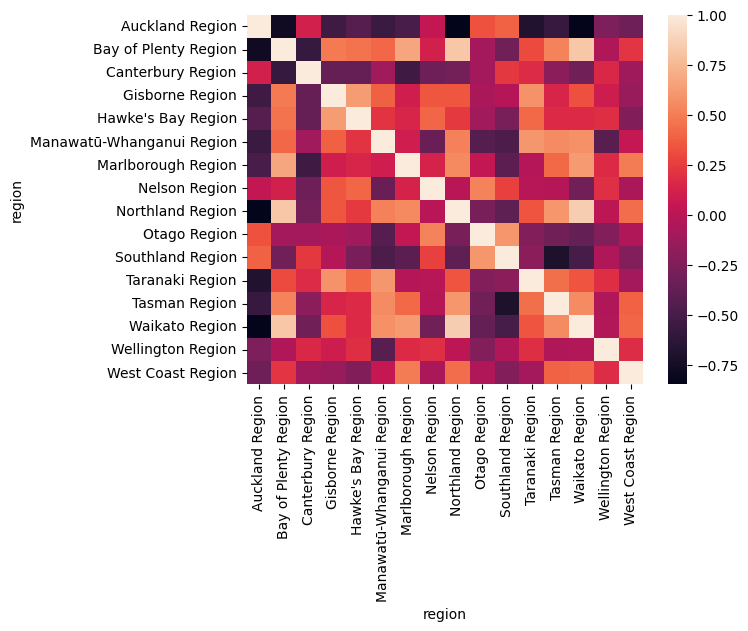

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(pt.corr(method='pearson'), annot=False)
plt.show()

In [20]:
pt2 = pd.pivot_table(cas_df,
                     values='fatalCount',
                     index='crashYear', 
                     columns='region', 
                     aggfunc=np.sum)
for column in pt2.columns: 
    pt2[column] = pt2[column]/annual_counts['fatalCount']

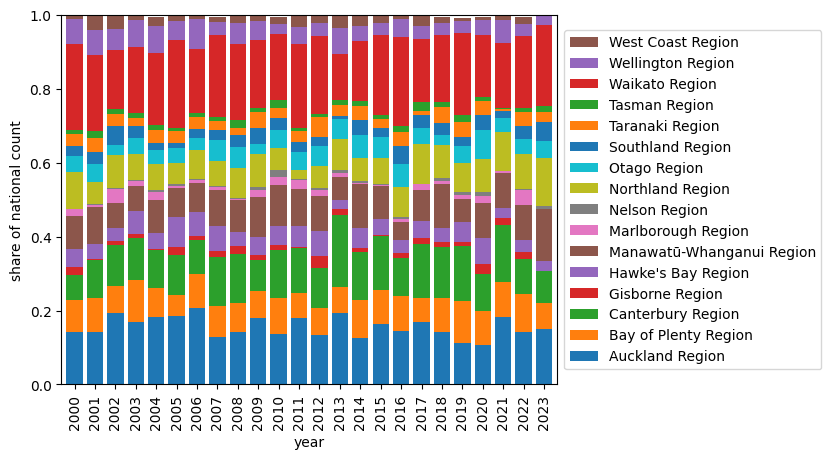

In [21]:
ax = pt2.plot.bar(stacked=True, width = 0.8, ylim=(0,1), ylabel='share of national count', xlabel='year')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1.0, 0.5))

### Choropleth maps

In [22]:
import geopandas as gpd

In [23]:
map_df = gpd.read_file("./nz_region.geojson")
map_df.set_index("REGC2016_N", drop=True, inplace=True)
map_df.drop(["REGC2016"], axis=1, inplace=True)

In [24]:
harm_df = pd.pivot_table(cas_df, 
                         values=['crashCount','minorInjuryCount','seriousInjuryCount','fatalCount'], 
                         index='region',
                         aggfunc=np.sum)

In [25]:
harm_df['fatalitiesPer100crashes'] = 100*harm_df['fatalCount'] / harm_df['crashCount']
harm_df['injuriesPer100crashes'] = 100*(harm_df['minorInjuryCount']+harm_df['seriousInjuryCount']) / harm_df['crashCount']


In [26]:
mapharm_df = pd.concat([map_df,harm_df], axis=1)
mapharm_df

,AREA_SQ_KM,LAND_SQ_KM,rmapshaperid,geometry,crashCount,fatalCount,minorInjuryCount,seriousInjuryCount,fatalitiesPer100crashes,injuriesPer100crashes
Northland Region,12510.3503,12497.9209,0,"MULTIPOLYGON (((174.70210 -35.95510, 174.70580...",33299,667.0,11902.0,3192.0,2.003063,45.328689
Auckland Region,4940.8756,4939.8049,1,"MULTIPOLYGON (((175.16600 -36.90360, 175.16900...",285346,1343.0,77518.0,12372.0,0.470657,31.502106
Waikato Region,24578.1774,23899.7930,2,"MULTIPOLYGON (((174.86390 -38.10250, 174.86610...",87849,1676.0,31241.0,7561.0,1.907819,44.168972
Bay of Plenty Region,12280.4622,12070.5112,3,"MULTIPOLYGON (((177.13920 -38.01110, 177.13480...",47177,740.0,14256.0,3636.0,1.568561,37.925260
Gisborne Region,8385.8161,8385.8161,4,"MULTIPOLYGON (((178.34320 -38.37900, 178.34600...",9784,121.0,3039.0,759.0,1.236713,38.818479
Hawke's Bay Region,14191.2980,14137.2063,5,"MULTIPOLYGON (((177.03000 -39.83170, 177.02850...",32388,421.0,10487.0,2583.0,1.299864,40.354452
Taranaki Region,7254.3159,7254.3159,6,"POLYGON ((174.61510 -38.70660, 174.61400 -38.7...",18604,271.0,6950.0,1590.0,1.456676,45.904107
Manawatū-Whanganui Region,22220.5036,22220.5036,7,"POLYGON ((176.08570 -39.12940, 176.08460 -39.1...",46329,764.0,15722.0,4032.0,1.649075,42.638520
Wellington Region,8119.5100,8048.6185,8,"MULTIPOLYGON (((174.86530 -41.25270, 174.86780...",79725,435.0,21618.0,4329.0,0.545626,32.545626
West Coast Region,23319.6480,23243.8118,9,"MULTIPOLYGON (((168.88340 -43.85930, 168.88650...",7218,169.0,2741.0,843.0,2.341369,49.653644


array([<AxesSubplot: title={'center': 'injuriesPer100crashes'}>,
       <AxesSubplot: title={'center': 'fatalitiesPer100crashes'}>],
      dtype=object)

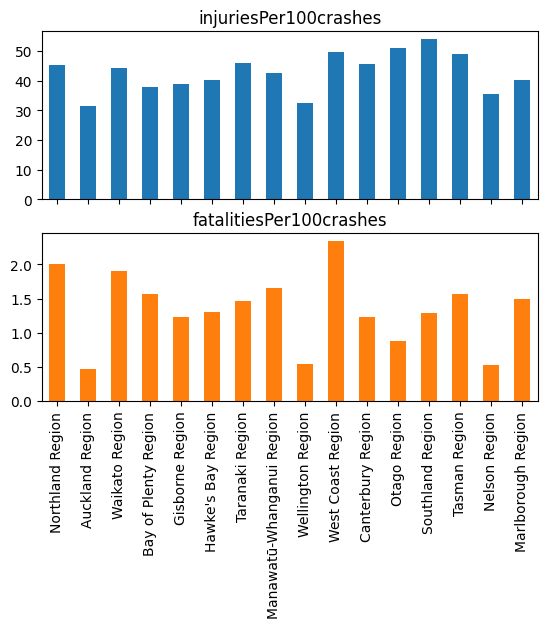

In [27]:
mapharm_df.plot(y=["injuriesPer100crashes","fatalitiesPer100crashes"],kind="bar",subplots=True,legend=False)

<AxesSubplot: >

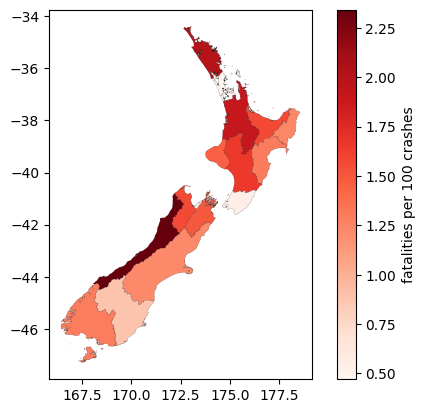

In [28]:
mapharm_df.plot(column="fatalitiesPer100crashes", cmap="Reds", legend=True, edgecolor="black", linewidth=0.1, 
                legend_kwds={"label":"fatalities per 100 crashes"})

<AxesSubplot: >

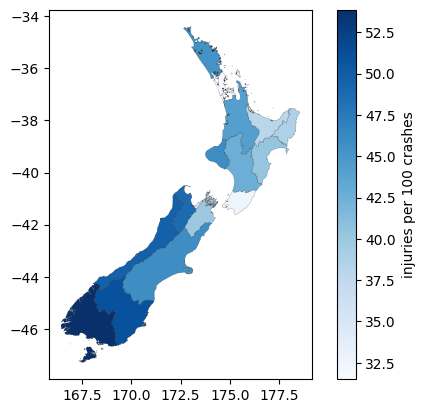

In [29]:
mapharm_df.plot(column="injuriesPer100crashes", cmap="Blues", legend=True, edgecolor="black", linewidth=0.1, 
                legend_kwds={"label":"injuries per 100 crashes"})

Could we have identified West Coast from looking at fatalities alone, or is this consistent with fatality comparison between urban and rural regions? Note that the higher harm rate down South could be due to under-reporting of harmless crashes.

In [46]:
df['fatalCount'].value_counts()

0.0    814154
1.0      6854
2.0       567
3.0       115
4.0        39
5.0         7
6.0         3
7.0         2
8.0         1
9.0         1
Name: fatalCount, dtype: int64

## Elements of high fatality
Explore a simple question: which vehicle types or roadside features may be associated with higher fatality rates (i.e. number of fatalities per crash)? This exploratory analysis will be more ad-hoc and rely on some custom functions.

In [30]:
from cas_functions import fatal_agg1, fatal_agg2, format_vertical_headers

### Particular agents

In [31]:
agfat_df = fatal_agg1(agent_types, cas_df)
agfat_df

,crashes,fatalCrashes,fatalities,fatal_fraction,fatality_rate
pedestrian,26605,877,891,0.032964,0.033490
bicycle,23400,238,242,0.010171,0.010342
moped,5805,23,23,0.003962,0.003962
motorcycle,29004,1000,1036,0.034478,0.035719
bus,12900,144,164,0.011163,0.012713
schoolBus,612,17,17,0.027778,0.027778
suv,81445,884,1015,0.010854,0.012462
truck,63476,1415,1634,0.022292,0.025742
train,503,61,70,0.121272,0.139165
taxi,8536,25,26,0.002929,0.003046


According to this [article](https://www.nzta.govt.nz/resources/nz-pedestrian-profile/6.html) on the Waka Kotahi website, pedestrian fatalities constitute 11% of total fatalities in New Zealand. Indeed, we find that $877/8573 \times 100 = 10.4\%$, which seems close enough. 

In [32]:
agfat_df['fatalities']['pedestrian']/cas_df['fatalCount'].sum()

0.10393094599323457

<AxesSubplot: >

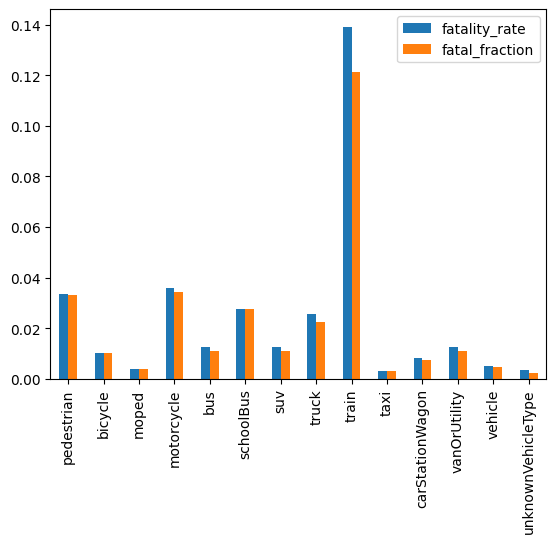

In [33]:
agfat_df[['fatality_rate','fatal_fraction']].plot.bar()

The plot clearly shows that crashes involving a `train` have the highest fatality **rate**, followed by `motorcycle` and then `pedestrian`. To be clear, even though crashes involving a train are relatively rare, when they do happen they are more likely to produce fatalities than crashes that involve a bus instead.

array([<AxesSubplot: title={'center': 'Aggregates for different agents involved'}>,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

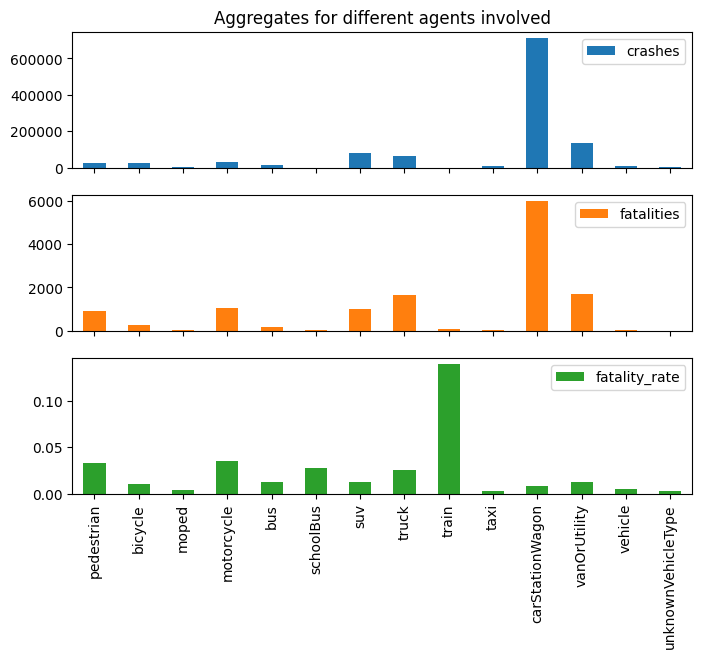

In [34]:
agfat_df[['crashes','fatalities','fatality_rate']].plot.bar(subplots=True,title=['Aggregates for different agents involved','',''], figsize=(8,6))

### Specific features

In [35]:
fefat_df = fatal_agg1(feature_types, cas_df)
fefat_df

,crashes,fatalCrashes,fatalities,fatal_fraction,fatality_rate
bridge,4525,177,205,0.039116,0.045304
cliffBank,35260,577,635,0.016364,0.018009
ditch,31201,655,713,0.020993,0.022852
fence,69193,1068,1178,0.015435,0.017025
guardRail,25448,365,413,0.014343,0.016229
houseOrBuilding,7788,72,79,0.009245,0.010144
kerb,11722,139,155,0.011858,0.013223
objectThrownOrDropped,681,2,2,0.002937,0.002937
otherObject,7724,108,121,0.013982,0.015665
parkedVehicle,81561,154,172,0.001888,0.002109


<AxesSubplot: >

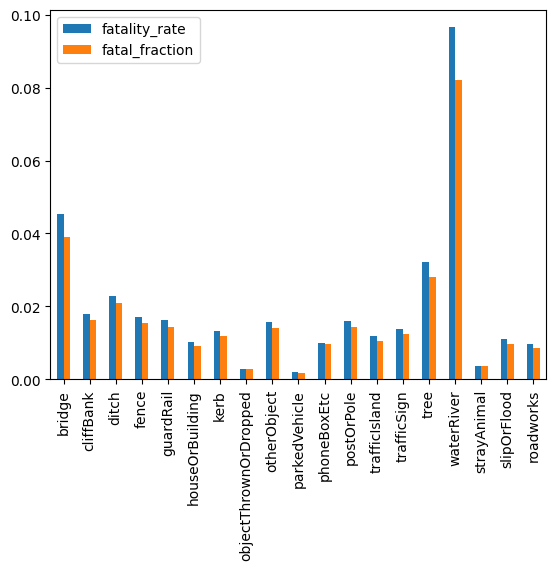

In [36]:
fefat_df[['fatality_rate','fatal_fraction']].plot.bar()

array([<AxesSubplot: title={'center': 'Aggregates for different features involved'}>,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

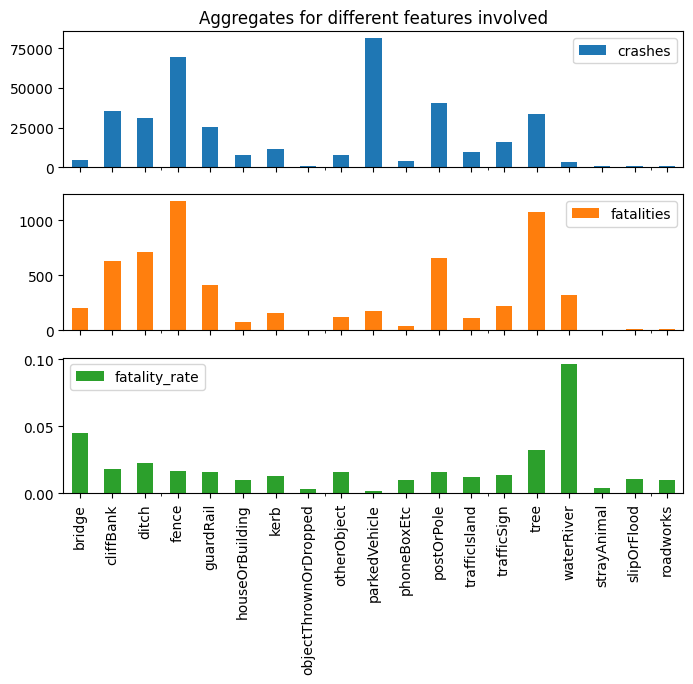

In [37]:
fefat_df[['crashes','fatalities','fatality_rate']].plot.bar(subplots=True,title=['Aggregates for different features involved','',''], figsize=(8,6))

### Pair combinations

Here we look at what might be the most fatal pairings.

In [39]:
result = fatal_agg2(agent_types+feature_types, agent_types, cas_df)

In [48]:
format_vertical_headers(result['fatalfracmat_df'])

,pedestrian,bicycle,moped,motorcycle,bus,schoolBus,suv,truck,train,taxi,carStationWagon,vanOrUtility,vehicle,unknownVehicleType
pedestrian,0.037879,0.005272,0.000000,0.038348,0.044213,0.041667,0.037058,0.137931,0.000000,0.017341,0.026104,0.050263,0.071429,0.007194
bicycle,0.005272,0.031884,0.021277,0.039683,0.020356,0.000000,0.013393,0.072792,0.200000,0.000000,0.005186,0.018722,0.004237,0.000000
moped,0.000000,0.021277,0.000000,0.027778,0.000000,0.000000,0.008174,0.058333,0.000000,0.000000,0.001333,0.004454,0.000000,0.000000
motorcycle,0.038348,0.039683,0.027778,0.096210,0.078431,0.333333,0.047104,0.137356,0.428571,0.012903,0.021000,0.050612,0.019355,0.000000
bus,0.044213,0.020356,0.000000,0.078431,0.007407,0.028381,0.010471,0.012069,0.500000,0.008368,0.006960,0.010448,0.005226,0.000000
schoolBus,0.041667,0.000000,0.000000,0.333333,0.028381,0.000000,0.051282,0.042553,,0.000000,0.027190,0.010753,0.037037,0.000000
suv,0.037058,0.013393,0.008174,0.047104,0.010471,0.051282,0.010283,0.024363,0.104167,0.004963,0.007058,0.010673,0.006553,0.004292
truck,0.137931,0.072792,0.058333,0.137356,0.012069,0.042553,0.024363,0.033546,0.142857,0.003030,0.018885,0.024631,0.015472,0.000000
train,0.000000,0.200000,0.000000,0.428571,0.500000,,0.104167,0.142857,,0.000000,0.118467,0.090909,,
taxi,0.017341,0.000000,0.000000,0.012903,0.008368,0.000000,0.004963,0.003030,0.000000,0.000000,0.002943,0.002639,0.002445,0.000000


So far this century, there have been 322170 crashes involving a pair `carStationWagon`'s, leading to 1137 deaths, which is more than any other pair combination on both counts. Second-most fatal combination is a `truck` and a `carStationWagon`, featuring in 38284 crashes causing 723 deaths.

## Potential future work

Given that we have coordinates, we can look at spatial clustering and even create a heat map for each year.
Is there a correlation between crash hot-zones and kill-zones? 

What might be a useful similarity measure for crash incidents, apart from location?